# <b>Incêndio na Floresta</b>

Instituto Nacional de Pesquisas Espaciais <br>
Programa de Pós-Graduação em Computação Aplicada <br>
CAP-465: Modelagem e Simulação de Sistemas Terrestres <br>
Docente: Pedro Ribeiro de Andrade Neto <br>
Discente: Mateus de Souza Miranda <br>


## O Modelo

Quando um modelo é baseado em aleatoriedade, não é possível confiar no resultado de uma única simulação porque simulações diferentes certamente produzirão resultados diferentes. Nesse caso, é necessário executar mais de uma simulação para estimar o resultado médio e sua estabilidade. O modelo de fogo na floresta, por exemplo, simula a disseminação de fogo em uma floresta, levando em conta algumas áreas sem vegetação. Como o estado inicial das células é escolhido aleatoriamente, executar a simulação novamente pode produzir resultados diferentes.
Investigue o modelo de fogo na floresta e analise os resultados relacionados à duração do incêndio, ao número de células queimadas e ao número de células florestais que sobrevivem no final das simulações. Repita 50 simulações com diferentes porcentagens de floresta inicial variando de 0% a 100% para analisar os seguintes cenários:


In [46]:
# Importa os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

### <b>Caso 1: O modelo Original</b>
O modelo padrão foi desenhado com Framework TerraME, em linguagem Lua, com parâmetros:
- Dimensão de mapa: 50;
- Porcentagem de área sem vegetação (empty): 0.2;
- Porcentagem inicial de floresta: 0.8;
- Final time: 100;
- Vizinhança: Von Neumann.


#### <b> 1.1 Médias das simulações</b>
Para cada tempo uma média das 50 simulações foi feita, concernindo a quantidade final de floresta. Dessa forma,

In [47]:
# Leitura do arquivo
medias = pd.read_csv('/content/caso1_resultado-medias.csv', sep=';')
# Transforma em DataFrame
mediasDF = pd.DataFrame(medias)


A seguir, a Gráfico 1 apresenta a relação entre a média de células florestais e o percentual de células não floreatais na simulação.

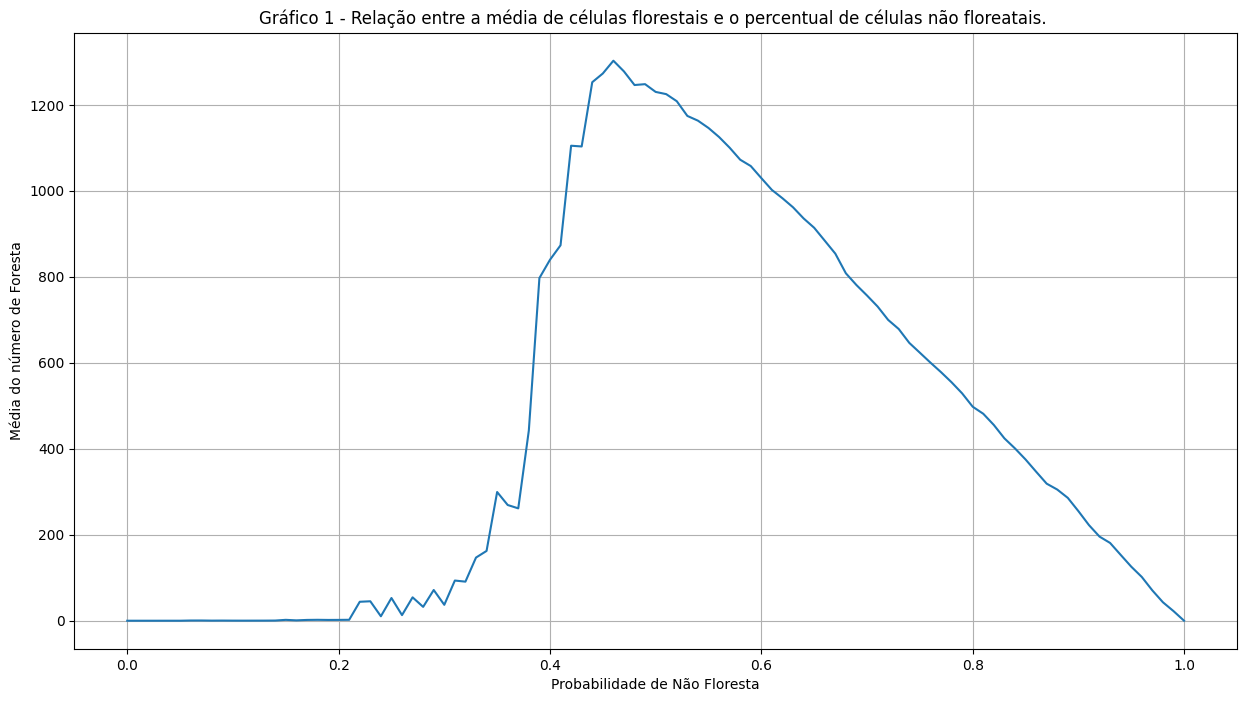

In [48]:
# Visualiza
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(mediasDF['empty'], mediasDF['average'])

ax.set(xlabel='Probabilidade de Não Floresta', ylabel='Média do número de Foresta',
       title='Gráfico 1 - Relação entre a média de células florestais e o percentual de células não floreatais. ')
ax.grid()
plt.show()

Note que a média de células florestais incrementa a medida que o número de células não florestais também incrementam. Entretando, após o tempo 46, essa média decrementa significamente. O trecho de código abaixo mostra o ponto de equilíbrio nesta simulação, i.e., o número de células florestais e não florestais.

In [49]:
# Pega o índice das linhas da coluna 'average'
for i in range(len(mediasDF['average'])):
  # Se a média for maior do que o valor máximo, mostre
  if mediasDF['average'][i] >= int(mediasDF['average'].max()):
    print('Tempo: ',i)
    print('Média de células florestais:', mediasDF['average'][i])
    print('Probabilidade de celulas não florestadas:', mediasDF['empty'][i])

Tempo:  46
Média de células florestais: 1302.82
Probabilidade de celulas não florestadas: 0.46


Levando em conta este melhor caso, considere a probabilidade de áreas não florestadas de `0.46`.

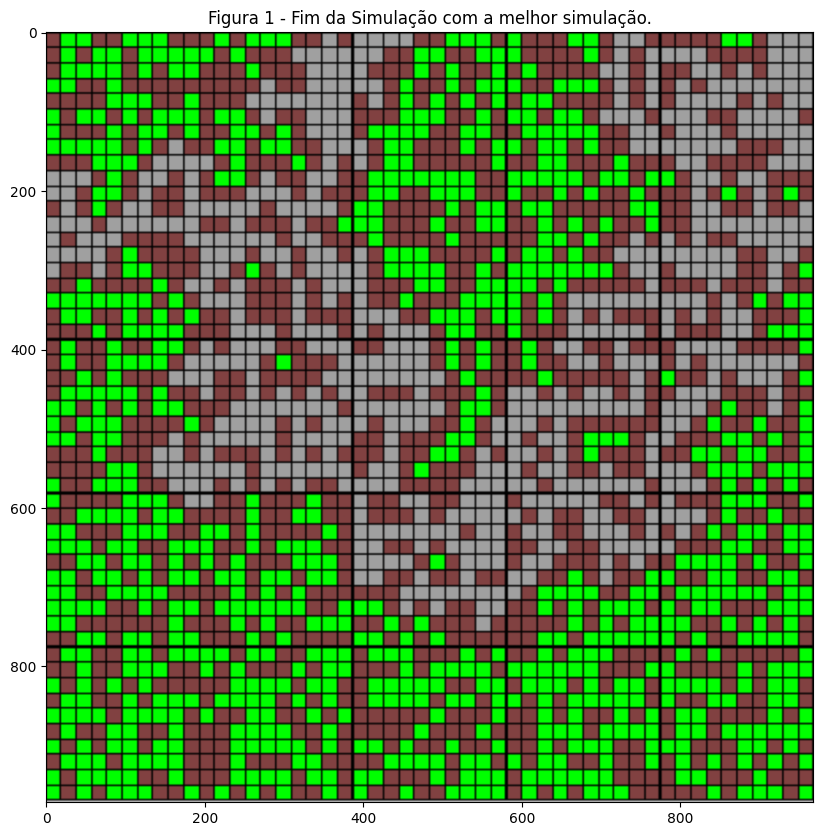

In [50]:
# Visualizar a simulação
img1 = Image.open('/content/caso1_mediaforest_1302_empty046.png')
plt.subplots(figsize=(10, 10))
plt.imshow(img1)
plt.title('Figura 1 - Fim da Simulação com a melhor simulação.')
plt.show()

Observe na Figura 1 que as células verdes representam as áreas de floresta, em marrom as áreas não florestadas, e em cinza áreas queimadas. Nesta simulação, foi considerado o percentual de 0.46 de áreas não florestadas combinados com os demais parâmetros, houveram poucas células queimadas.

#### <b>1.2 Resultado completo</b>
Considere analisar todas as 50 simulações, com 100 tempos cada simulação, totalizando 5050 tempos.

In [51]:
# Leitura do arquivo
fullfile = pd.read_csv('/content/caso1_resultado.csv', sep=';')
# Transforma em DataFrame
fullfileDF = pd.DataFrame(fullfile)

Selecione apenas os tempos finais das simulações:

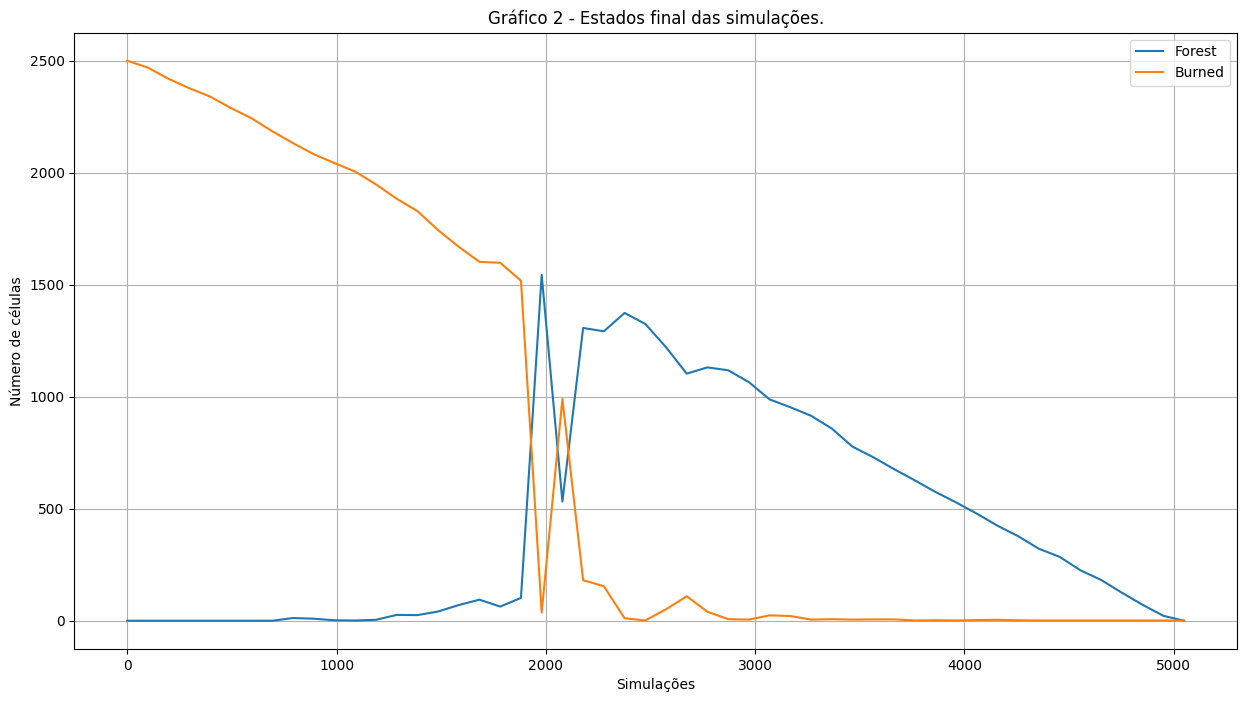

In [52]:
# Listas
lastTimeOfSimulation_forest = []
lastTimeForestIndex = []
lastTimeOfSimulation_burned =  []
lastTimeBurnedIndex = []

# Ler o último tempo da simulação
for i in range(0, len(fullfileDF['forest']), 99):
  # Salva o número de células
  lastTimeOfSimulation_forest.append(fullfileDF['forest'][i])
  lastTimeForestIndex.append(i)
  lastTimeOfSimulation_burned.append(fullfileDF['burned'][i])
  lastTimeBurnedIndex.append(i)

# Legenda
legenda = ['Forest', 'Burned']
# Visualiza
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(lastTimeForestIndex, lastTimeOfSimulation_forest)
ax.plot(lastTimeBurnedIndex, lastTimeOfSimulation_burned)
ax.legend(legenda)
ax.set(xlabel='Simulações', ylabel='Número de células',
       title='Gráfico 2 - Estados final das simulações.')
ax.grid()
plt.show()

O Gráfico 2 demonstra diversos comportamentos ao passo que a probabilidade de células não florestais é incrementada, sendo toda área queimada quando a probabilidade é 0, e sem registro de queimada quando a probabilidade é 1, i.e., 100%. Contudo, é notório duas reações esporádicas entre os estados de `Forest` e `Burned` na simulação, visto que ambos assumem picos alto e baixos de suas ocorrências. Isso ocorre devido a probabilidade de células não florestais correponderem a regiões bem como seu o número de células que favorecem e não favorecem a propagação do incêndio.

### <b>Caso 2: Usando um Vizinhança de Moore</b>
O segundo caso, considerou-se os parâmetros:
- Dimensão de mapa: 50;
- Porcentagem de área sem vegetação (empty): 0.2;
- Porcentagem inicial de floresta: 0.8;
- Final time: 100;
- Vizinhança: Moore.


#### <b> 2.1 Médias das simulações</b>
Dadas as médias das simulações,

In [53]:
# Leitura do arquivo
medias2 = pd.read_csv('/content/caso2_resultado-medias.csv', sep=';')
# Transforma em DataFrame
mediasDF2 = pd.DataFrame(medias2)

O Gráfico 3 compara os resultados dos Casos 1 e 2, representados nas cores

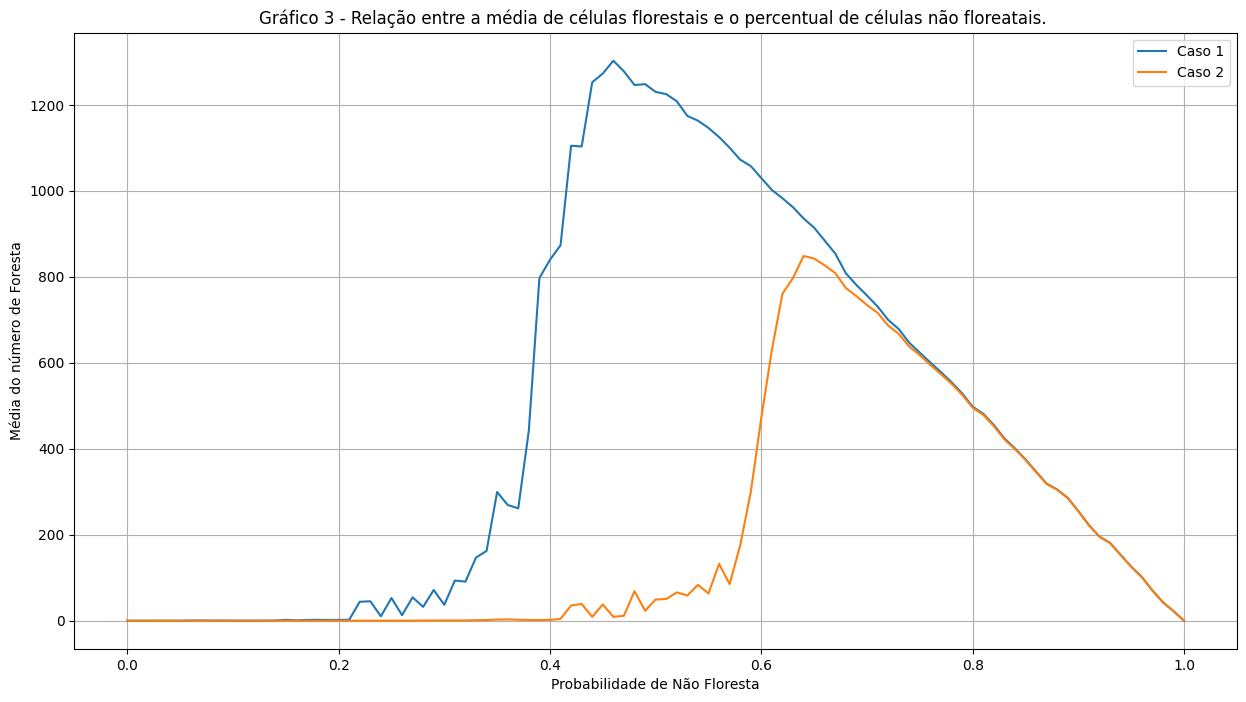

In [54]:
# Visualiza
legenda2 = ['Caso 1', 'Caso 2']
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(mediasDF['empty'], mediasDF['average'])
ax.plot(mediasDF2['empty'], mediasDF2['average'])
ax.legend(legenda2)

ax.set(xlabel='Probabilidade de Não Floresta', ylabel='Média do número de Foresta',
       title='Gráfico 3 - Relação entre a média de células florestais e o percentual de células não floreatais. ')
ax.grid()
plt.show()

Neste caso, adotando a regra de vizinhaça Moore, invés de Von Neumann, a probabilidade de não haver células florestais é menor, visto que mais células adjacentes se conectam e espalham o fogo. Não obstante, o primeiro Caso há menos células adjacentes, por isso, menos chances de o fogo se espalhar para as demais células.

A melhor simulação desse caso de estudo é obtida a seguir, onde a médias de células florestais é maior,

In [55]:
# Pega o índice das linhas da coluna 'average'
for i in range(len(mediasDF2['average'])):
  # Se a média for maior do que o valor máximo, mostre
  if mediasDF2['average'][i] >= int(mediasDF2['average'].max()):
    print('Tempo: ',i)
    print('Média de células florestais:', mediasDF2['average'][i])
    print('Probabilidade de células não florestadas:', mediasDF2['empty'][i])

Tempo:  64
Média de células florestais: 848.6
Probabilidade de células não florestadas: 0.64


Com base nisso, usou-se a probabilidade de células não florestais, e os demais parâmetros padrões, para visualizar a simulação desse melhor caso. Na Figura 2, mostra a propagação mínima do fogo, visto que há mais chances de o fogo encontrar células sem floresta a com floresta, portanto, há mais probabilidade de haver células sem marca de queimada.

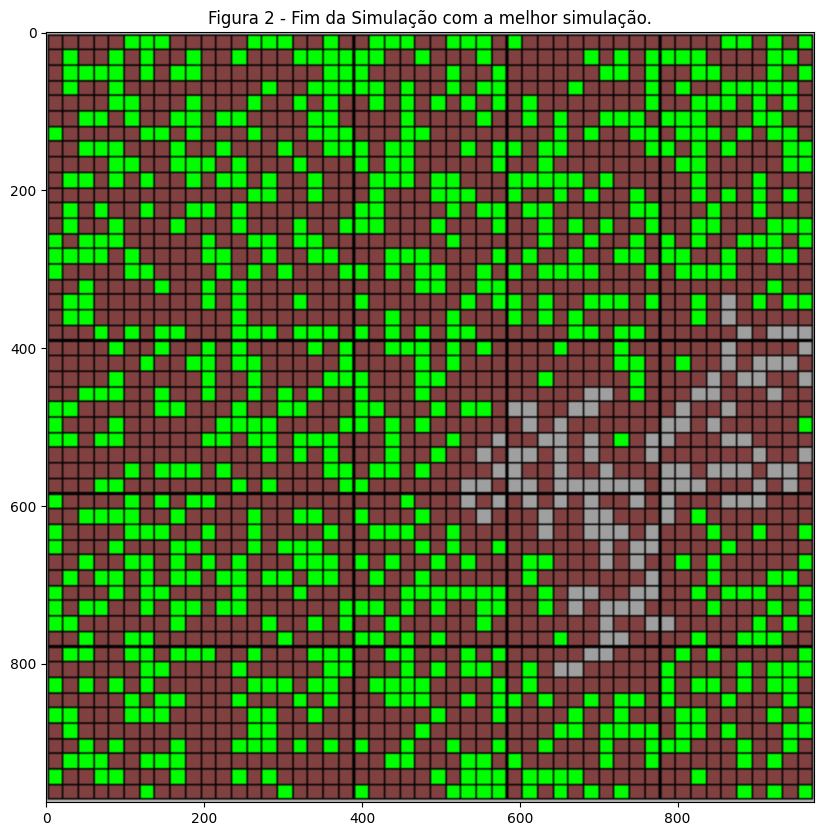

In [56]:
# Visualizar a simulação
img1 = Image.open('/content/caso2_mediaforest_848_empty064.png')
plt.subplots(figsize=(10, 10))
plt.imshow(img1)
plt.title('Figura 2 - Fim da Simulação com a melhor simulação.')
plt.show()

#### <b>2.2 Resultado completo</b>
Considere analisar todas as 50 simulações, com 100 tempos cada simulação, totalizando 5050 tempos.

In [57]:
# Leitura do arquivo
fullfile = pd.read_csv('/content/caso2_resultado.csv', sep=';')
# Transforma em DataFrame
fullfileDF2 = pd.DataFrame(fullfile)

Dados os finais de cada simulação, observe o número de células florestais e não florestais no Gráfico 4

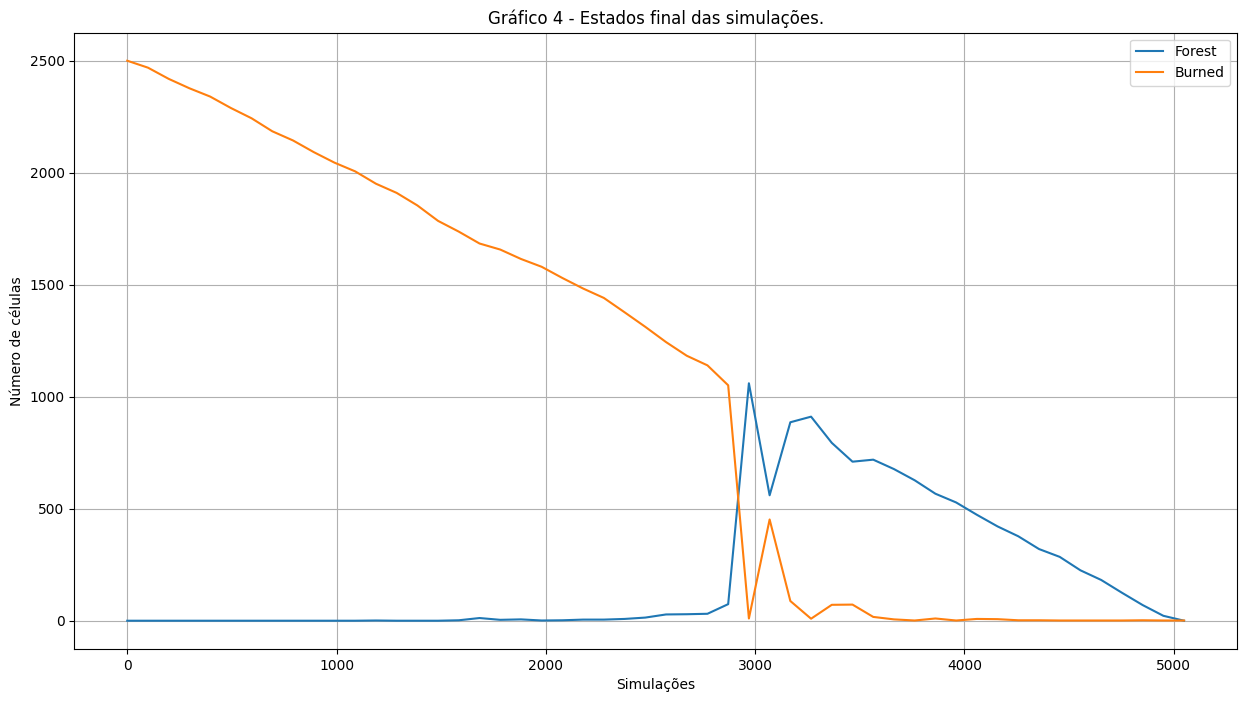

In [58]:
# Listas
lastTimeOfSimulation_forest2 = []
lastTimeForestIndex2 = []
lastTimeOfSimulation_burned2 =  []
lastTimeBurnedIndex2 = []

# Ler o último tempo da simulação
for i in range(0, len(fullfileDF2['forest']), 99):
  # Salva o número de células
  lastTimeOfSimulation_forest2.append(fullfileDF2['forest'][i])
  lastTimeForestIndex2.append(i)
  lastTimeOfSimulation_burned2.append(fullfileDF2['burned'][i])
  lastTimeBurnedIndex2.append(i)

# Legenda
legenda = ['Forest', 'Burned']
# Visualiza
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(lastTimeForestIndex2, lastTimeOfSimulation_forest2)
ax.plot(lastTimeBurnedIndex2, lastTimeOfSimulation_burned2)
ax.legend(legenda)
ax.set(xlabel='Simulações', ylabel='Número de células',
       title='Gráfico 4 - Estados final das simulações.')
ax.grid()
plt.show()

Tal como analisado no [Gráfico 2](https://colab.research.google.com/drive/1U8pPLwb36B_mwLJRArwqPzx5BfQxjkDk#scrollTo=q1wNngAO0BG3&line=5&uniqifier=1), as células de florestas são queimadas completamente em quase todas as simulações. Também há registros de picos altos e baixos de células `Burned` e `Forest`, mas sobretudo destaca-se o ponto próximo à simulação 3000, o qual foi mostrado na seção anterior. Em seguida, a probabilidade de regiões sem floresta aumenta, e o estado de queimado diminui ao mesmo passo que a probabilidade de haver células florestais.

### <b>Caso 3: Uma célula em chamas é queimada após dois passos de tempo, em vez de apenas um </b>
O modelo padrão foi desenhado com Framework TerraME, em linguagem Lua, com parâmetros:
- Dimensão de mapa: 50;
- Porcentagem de área sem vegetação (empty): 0.2;
- Porcentagem inicial de floresta: 0.8;
- Final time: 100;
- Vizinhança: Von Neumann.


#### <b> 3.1 Médias das simulações</b>
Dadas as médias das simulações,

In [59]:
# Leitura do arquivo
medias3 = pd.read_csv('/content/caso3_resultado-medias.csv', sep=';')
# Transforma em DataFrame
mediasDF3 = pd.DataFrame(medias3)

Assuma que o tempo atualizar o estado de `queimando` para `queimado` deixe de ser um passe a ser dois passos,

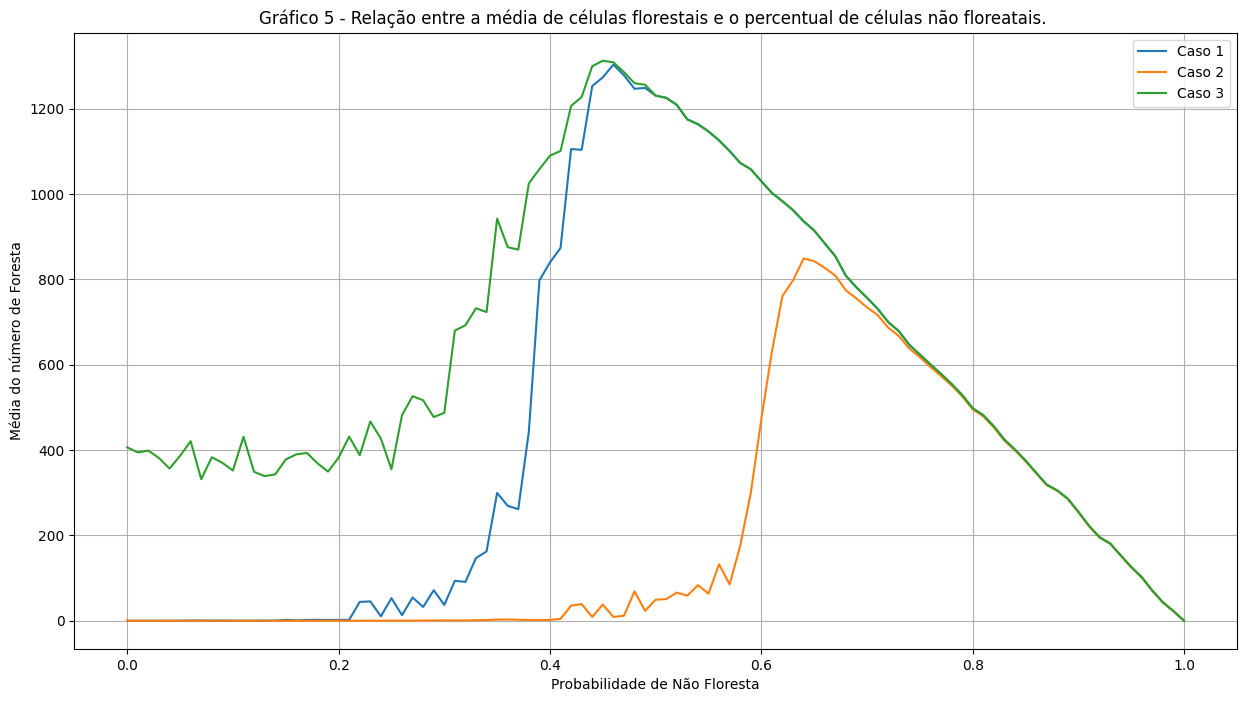

In [60]:
# Visualiza
legenda3 = ['Caso 1', 'Caso 2', 'Caso 3']
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(mediasDF['empty'], mediasDF['average'])
ax.plot(mediasDF2['empty'], mediasDF2['average'])
ax.plot(mediasDF3['empty'], mediasDF3['average'])
ax.legend(legenda3)

ax.set(xlabel='Probabilidade de Não Floresta', ylabel='Média do número de Foresta',
       title='Gráfico 5 - Relação entre a média de células florestais e o percentual de células não floreatais. ')
ax.grid()
plt.show()

No Gráfico 5, os três casos de estudos são colados lado a lado. O terceiro cenário se destaca entre os demais, cuja média da probabilidade de haver mais células florestais é maior e decaí à proporção que a probabilidade de células não florestais aumenta. Este fator de maior conservação do estado se dá pelo prologamento do estado `queimando`, que naturalmente conserva por mais tempo o estado `floresta` das demais células adjacentes. Em função disso, mais tempo seria necessário para que os estados da células atualizem, tal como mostrado na Figura 3.

Conforme usado para as demais simulações dos Casos de estudo, usou-se o tempo final para fins comparativos. Selecione a melhor simulação da média,

In [61]:
# Pega o índice das linhas da coluna 'average'
for i in range(len(mediasDF3['average'])):
  # Se a média for maior do que o valor máximo, mostre
  if mediasDF3['average'][i] >= int(mediasDF3['average'].max()):
    print('Tempo: ',i)
    print('Média de células florestais:', mediasDF3['average'][i])
    print('Probabilidade de células não florestadas:', mediasDF3['empty'][i])

Tempo:  45
Média de células florestais: 1312.04
Probabilidade de células não florestadas: 0.45


Considerando a probabilidade de células não florestais de 0.45, e o passo de 2 tempos para atualizar o estado se tem:

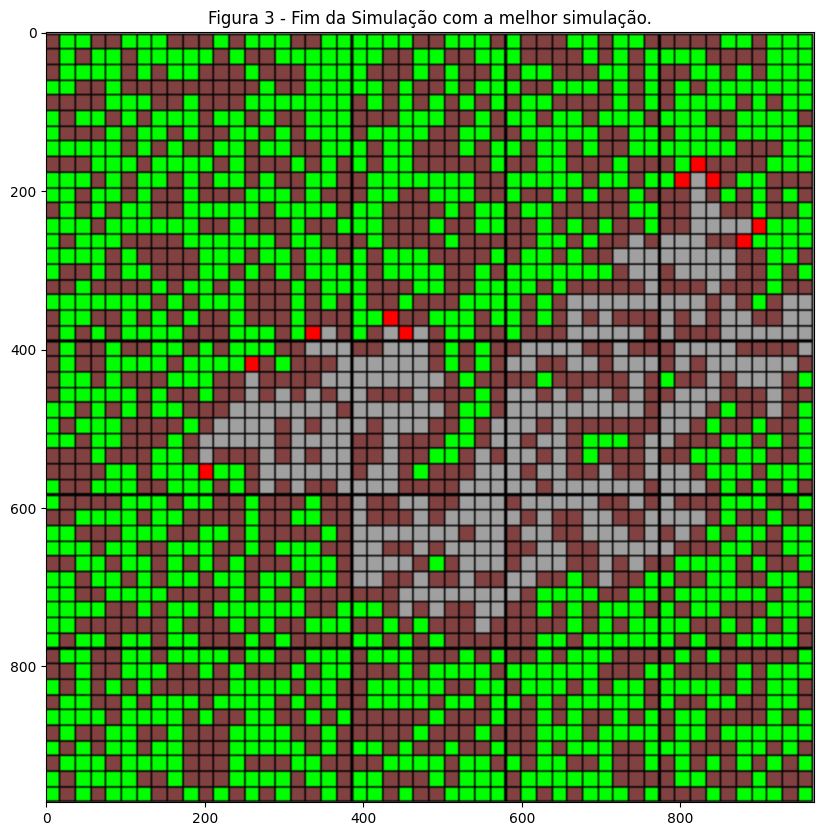

In [62]:
# Visualizar a simulação
img1 = Image.open('/content/caso3_mediaforest_1312_empty045.png')
plt.subplots(figsize=(10, 10))
plt.imshow(img1)
plt.title('Figura 3 - Fim da Simulação com a melhor simulação.')
plt.show()

A Figura 3 ilustra que o tempo usado na simulação não é suficiente, sendo necessário pelo menos duas vezes mais tempo para se visualizar o trajeto do fogo e o número total células florestais, no fim da simulação. Entretanto, essa é a melhor reprodução, dado os parâmetros, em termos de probabilidade de células florestais preservadas.

Observando a direção que o fogo se propagada no mapa, pode-se supor que as células florestais da topo do mapa, nos sentidos da diagonal principal serão queimadas, enquanto as da parte inferiror serão mantidas, levando em conta a regra de vizinhança Von Neumann.

#### <b>3.2 Resultado completo</b>
Considere analisar todas as 50 simulações, com 100 tempos cada simulação, totalizando 5050 tempos.

In [63]:
# Leitura do arquivo
fullfile = pd.read_csv('/content/caso3_resultado.csv', sep=';')
# Transforma em DataFrame
fullfileDF3 = pd.DataFrame(fullfile)

Dados os finais das 50 simulações,

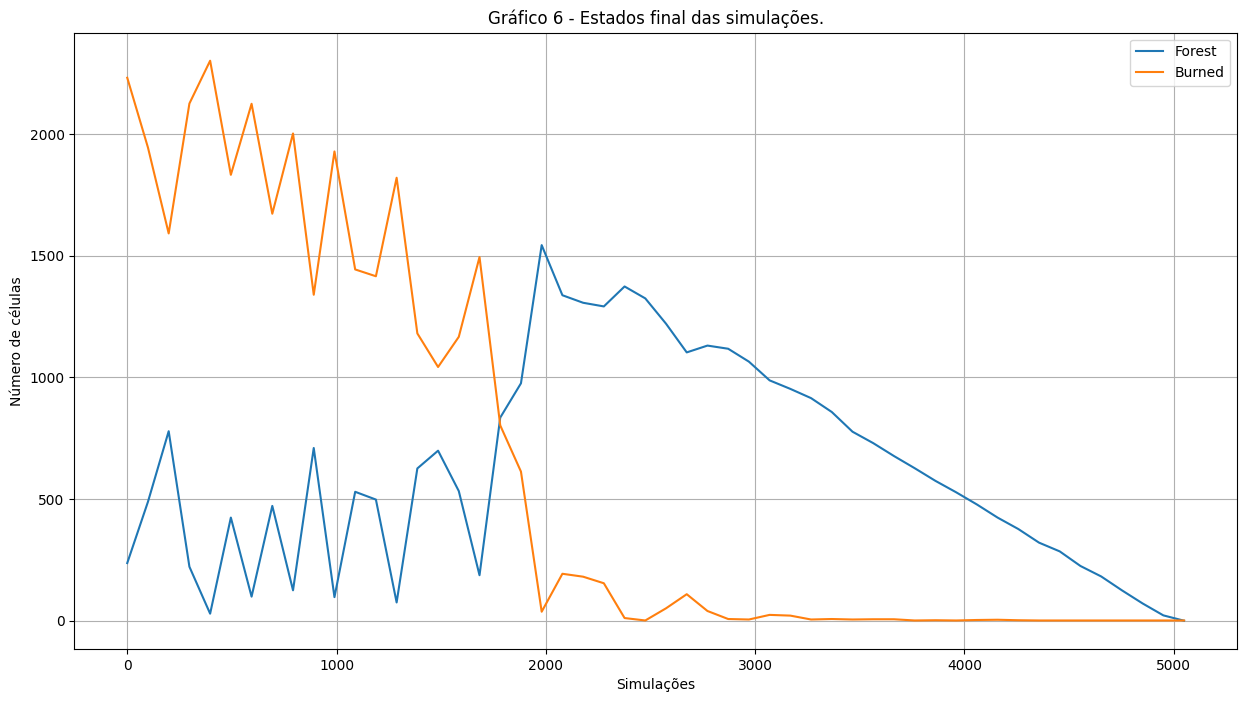

In [64]:
# Listas
lastTimeOfSimulation_forest3 = []
lastTimeForestIndex3 = []
lastTimeOfSimulation_burned3 =  []
lastTimeBurnedIndex3 = []

# Ler o último tempo da simulação
for i in range(0, len(fullfileDF3['forest']), 99):
  # Salva o número de células
  lastTimeOfSimulation_forest3.append(fullfileDF3['forest'][i])
  lastTimeForestIndex3.append(i)
  lastTimeOfSimulation_burned3.append(fullfileDF3['burned'][i])
  lastTimeBurnedIndex3.append(i)

# Legenda
legenda = ['Forest', 'Burned']
# Visualiza
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(lastTimeForestIndex3, lastTimeOfSimulation_forest3)
ax.plot(lastTimeBurnedIndex3, lastTimeOfSimulation_burned3)
ax.legend(legenda)
ax.set(xlabel='Simulações', ylabel='Número de células',
       title='Gráfico 6 - Estados final das simulações.')
ax.grid()
plt.show()

Diferente dos demais casos de estudo, no Gráfico 6 há variações nos estados de `Burned` e `Forest`, devido a distribuição e a probabilidade de células não florestais, sobretudo devido ao retardo do passo de tempo da atualização da transição do estado `Forest` para `Burning`, e `Burning` para `Burned`. Todavia, a partir da simulação 2000 notou-se um comportamento que os demais casos de estudo apotam o mesmo padrão, o decaímento das chances do estados `Burned` e `Forest` em detrimento ao aumento da probabilidade de áreas sem florestas. Isso pode ser visualizado no Gráfico 5, visto que os três Casos de estudo mostram a mesma inclinação para as últimas simulações.

### <b>Caso 4: Alterando o espaço para 100x100 células </b>
O modelo padrão foi desenhado com Framework TerraME, em linguagem Lua, com parâmetros:
- Dimensão de mapa: 100;
- Porcentagem de área sem vegetação (empty): 0.2;
- Porcentagem inicial de floresta: 0.8;
- Final time: 100;
- Vizinhança: Von Neumann.


#### <b> 4.1 Médias das simulações</b>
Dadas as médias das simulações,

In [65]:
# Leitura do arquivo
medias4 = pd.read_csv('/content/caso4_resultado-medias.csv', sep=';')
# Transforma em DataFrame
mediasDF4 = pd.DataFrame(medias4)

Um cenário com dimensão maior, que corresponde a 4 células dos demais casos, conforme apresentado na Figura 4. O Gráfico 7 mostra a média do número de células florestais que restam no final das simulações, de todos os Casos de estudo.

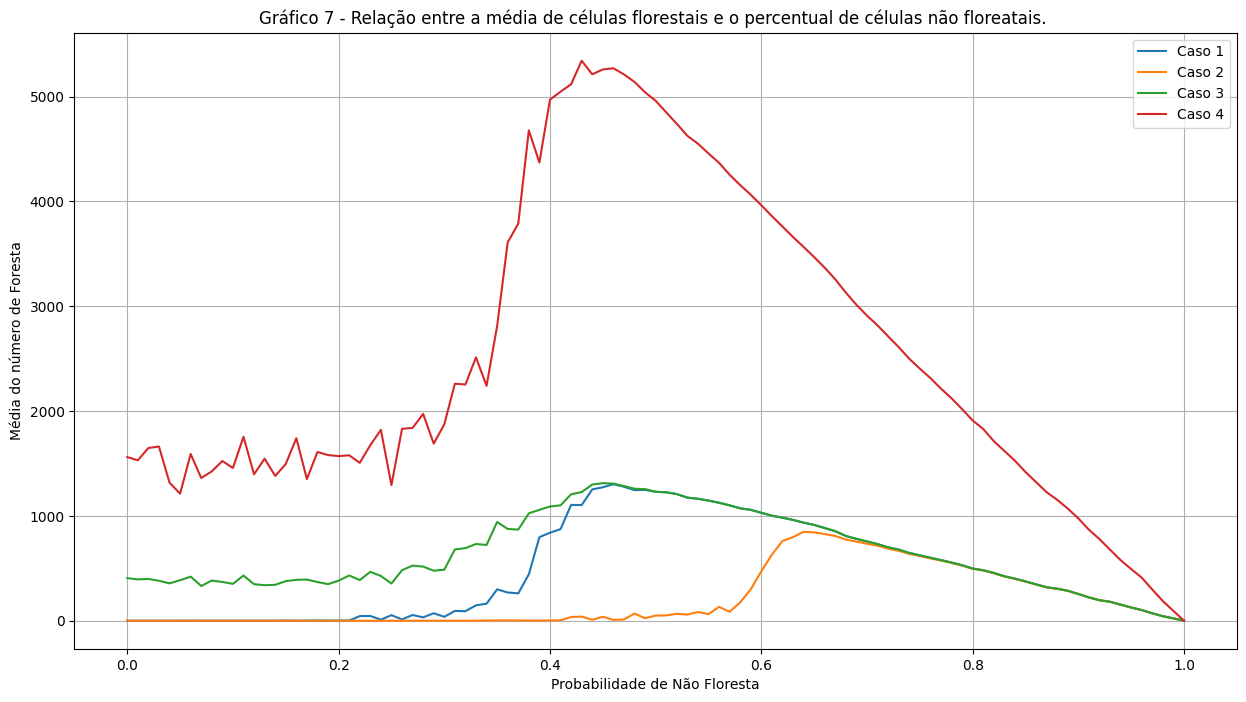

In [45]:
# Visualiza
legenda4 = ['Caso 1', 'Caso 2', 'Caso 3', 'Caso 4']
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(mediasDF['empty'], mediasDF['average'])
ax.plot(mediasDF2['empty'], mediasDF2['average'])
ax.plot(mediasDF3['empty'], mediasDF3['average'])
ax.plot(mediasDF4['empty'], mediasDF4['average'])
ax.legend(legenda4)

ax.set(xlabel='Probabilidade de Não Floresta', ylabel='Média do número de Foresta',
       title='Gráfico 7 - Relação entre a média de células florestais e o percentual de células não floreatais. ')
ax.grid()
plt.show()

Embora o Caso 4 tragá semelhantes parâmetros ao modelo padrão, diferenciando-se apenas na dimensão, notou-se uma tendência diferente. Os primeiros finais das simulações mostram mais células florestais, algo visto apenas no Caso 3, enquanto que no Caso 1 a média aumentou quando a probabilidade de células sem floresta também aumentava. Portanto, os fatores de tempo de execução e dimensão do mapa influenciam nos resultados.

Com relação à dimensão do mapa, i.e., mostra-se com resolução mais fina, o que antes uma célula representava agora 4 representam. Por isso, mais tempo é requerido para observar os fenômenos, semelhante ao Caso 3. Apesar disso, para todos os modelos, um mesmo efeito é observado: a influência da probabilidade de áreas sem floresta que diminuem as incidências de florestas e queimadas.

Considere observar a melhor simulação, àquela com a maior média de floresta:

In [66]:
# Pega o índice das linhas da coluna 'average'
for i in range(len(mediasDF4['average'])):
  # Se a média for maior do que o valor máximo, mostre
  if mediasDF4['average'][i] >= int(mediasDF4['average'].max()):
    print('Tempo: ',i)
    print('Média de células florestais:', mediasDF4['average'][i])
    print('Probabilidade de células não florestadas:', mediasDF4['empty'][i])

Tempo:  43
Média de células florestais: 5342.68
Probabilidade de células não florestadas: 0.43


Atualizando os parâmetros de dimensão para 100 e empty para 0.43 se tem esse resultado:

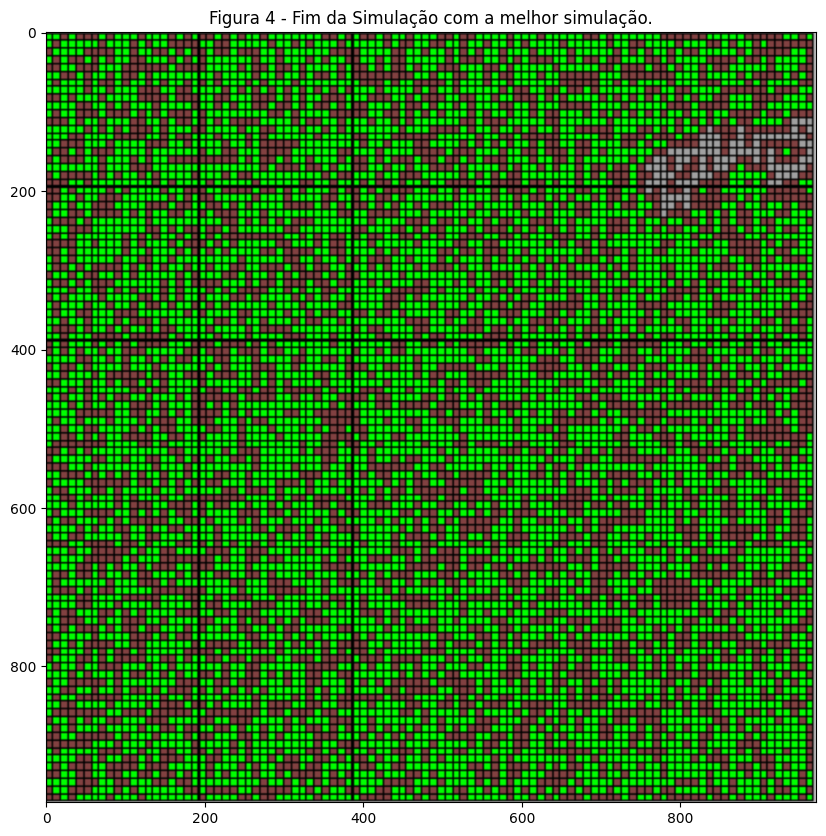

In [67]:
# Visualizar a simulação
img1 = Image.open('/content/caso4_mediaforest_5342_empty043.png')
plt.subplots(figsize=(10, 10))
plt.imshow(img1)
plt.title('Figura 4 - Fim da Simulação com a melhor simulação.')
plt.show()

A Figura 4 contém uma área maior. Mas a principal curiosidade é que a demanda de propagação do fogo a partir do foco de incêndio, é menor. Ou seja, a área de onde o foco sugiu possui poucas células florestais, e devido a regra de vizinhaça Von Neumann, apenas 4 vizinhos são afetados. Entretanto, se a regra de Moore for aplicada os resultados serão diferentes. Além disso, os vizinhos das células queimadas são células não florestais, consequentemente não propaga o fogo.

#### <b>4.2 Resultado completo</b>
Considere analisar todas as 50 simulações, com 100 tempos cada simulação, totalizando 5050 tempos.

In [68]:
# Leitura do arquivo
fullfile = pd.read_csv('/content/caso4_resultado.csv', sep=';')
# Transforma em DataFrame
fullfileDF4 = pd.DataFrame(fullfile)

Analise os finais das 50 simulações,

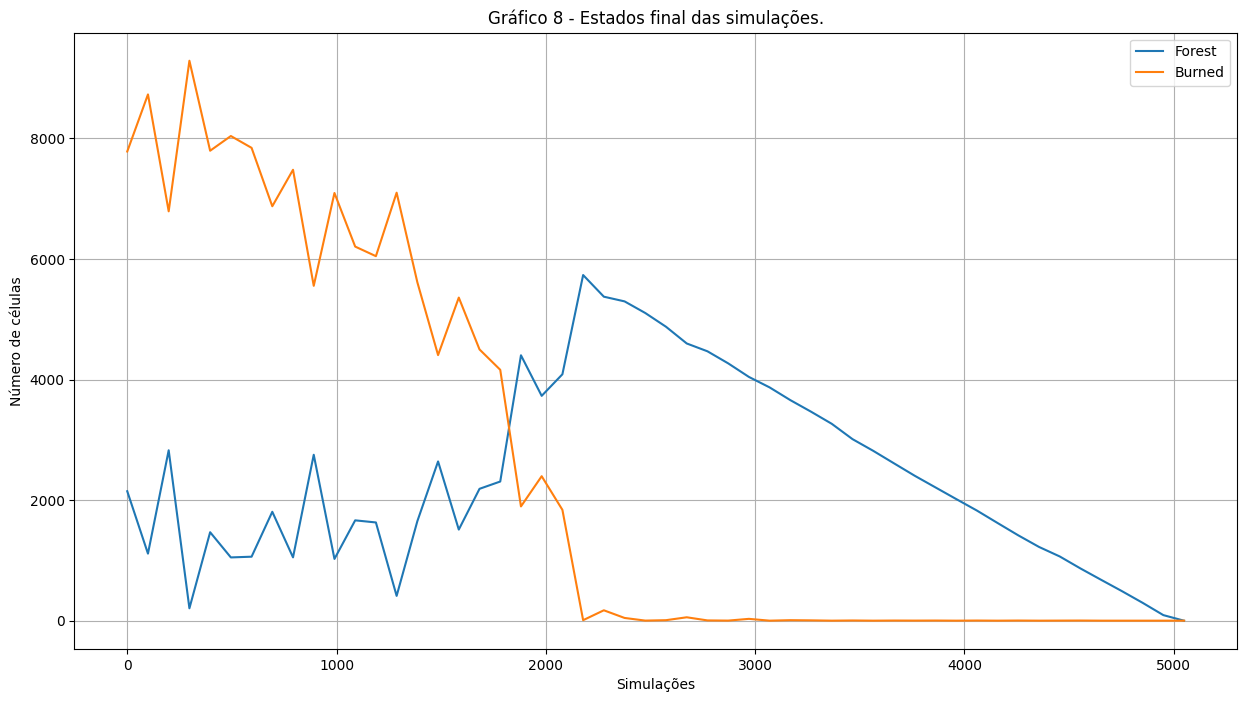

In [69]:
# Listas
lastTimeOfSimulation_forest4 = []
lastTimeForestIndex4 = []
lastTimeOfSimulation_burned4 =  []
lastTimeBurnedIndex4 = []

# Ler o último tempo da simulação
for i in range(0, len(fullfileDF4['forest']), 99):
  # Salva o número de células
  lastTimeOfSimulation_forest4.append(fullfileDF4['forest'][i])
  lastTimeForestIndex4.append(i)
  lastTimeOfSimulation_burned4.append(fullfileDF4['burned'][i])
  lastTimeBurnedIndex4.append(i)

# Legenda
legenda = ['Forest', 'Burned']
# Visualiza
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(lastTimeForestIndex4, lastTimeOfSimulation_forest4)
ax.plot(lastTimeBurnedIndex4, lastTimeOfSimulation_burned4)
ax.legend(legenda)
ax.set(xlabel='Simulações', ylabel='Número de células',
       title='Gráfico 8 - Estados final das simulações.')
ax.grid()
plt.show()

O Gráfico 8 enfatiza as relações destacadas nos tópicos anteriores, o tempo, a dimensão do mapa, e as probabilidade de distribuição das células `Forest` e `Empty`. A variação ocorre até um pouco depois da simulação 2000, onde os pontos se cruzam o que se considera chances iguais de haver queimadas e floresta no final da simulação.

Por outro lado, com a resolução mais fina, pode-se visualizar menos chances de queimadas, considerando a regra de Von Neumann, visto que mais células estam dispostas no espaço e diferentes chances de combinação, em termos espaciais.